# Introduction to Using Neural Netowrks  


### Hello! 

If you're here, you're probably a member of the Hamilton lab and you probably want or need to figure out how to use neural networks for your projects and other stuff. Great! This notebook should provide you with everything you need to get started. 

While this will be far from a comprehensive manual on machine learning, it'll definitely provide you with a full working example of how to code up an input pipeline, define and run a model, and what's required to do so. It will also introduce you to the concepts and operations underlying neural networks and some resources to learn more about them. 

This notebook will specifically work on basic feed forward netowrks, sometimes called multi-layer perceptrons (MLPs) or artificial neural networks (ANNs). We're going to use them to classify stuff, which is generally called supervised learning. Supervised learning is certainly not the only kind of task you can perform with ANNs, it just forms a good basis for lab project applications like decoding, encoding, and EEG analysis.

There are some other types of networks like convolutional and recurent networks, which perform different operations. I'll cover those in a different notebook, as they are a tad different in pretty substantial ways.  

___
## Getting Started 
### Requirements and Instalation 

Everything we'll be doing requires python 3.6 and requires some extra modules you may not have.  
To work with these examples, you're going to need some of the following modules on your machine:

* __Numpy__ - This is python's linear algebra package.
* __Tensorflow__ (`tf`) - Google's machine learning library (Extensive and powerful, but takes some time to master).
* __Keras__ - High level neural net library that uses Tensorflow backend (Almost as flexible as `tf`, but far easier to get up and running).

If you don't have these, they can be installed several ways.

I'd recommend getting Anaconda and creating a conda environment with these packages. Anaconda is a package manager useful for scientific computing.  
_[More on getting Anaconda](https://www.anaconda.com/distribution/)._

**Note:** It is necessary to install both Keras and Tensorflow for this notebook, but you'll use only one. Using the tensorflow module `tf.keras`  is almost identical to standalone `keras`, though the `tf.keras` uses slightly different stuff under the hood. You can use either one to run the examples in this notebook, but I'd reccomend `keras` for now.  Once you get the hang of keras, you can move on to or even combine it with regular tensorflow if you want to do something really fancy! 

##### After you install anaconda, you'll run something like this in your terminal:  
`conda create -n tensorflow_env tensorflow keras`   _* mind the spaces!_   
   
Here, `-n` is the name creation flag, `tensorflow_env` is the name of the environment passed to `-n`, and `tensorflow` and `keras` are the primary packages being installed. Anaconda will grab everything else you need to make these work!  
You can use any name you want for your environment by swapping `tensorflow_env` with `your_env_name`.

_* For more on installing tensorflow with anaconda, follow the instructions [here](https://www.anaconda.com/tensorflow-in-anaconda/)._ 

__Note:__ You may have to up- or down-grade the `tf` version. As of this writing, the stable versions are 1.12 or 1.13, but 2.0 has been rolled out. This isn't too big of an issue as we'll be using Keras anyway, and we only need a compatable version of tensorflow to work with Keras. To do so, replace `tensorflow` with `tesnorflow==1.12`  

##### To activate your environment, run:  
`conda activate tensorflow_env`
  
When active, your terminal will look something like:  
    
`(my_env_name) userid:/cur/open/path$` 
    
##### Then set the correct python version:  

`conda install python==3.6`  

_* You can use pip instead of conda here._
    
_* Make sure pip is up to date!!!_

For everyting you'll ever need on Keras, check out [this](https://keras.io/) resource.



*** 

### Check to see if the modules work

In [ ]:
import tensorflow as tf
import numpy as np
import keras as K 

# This will error if something above didn't work!
# Just activate your env and pip install your stuff again in that env to fix.

***
##  On to Networks 

### First things First 

Ok, so we've gotten our stuff set up. Now what?  

Well, we need to know what a neural network is and how to use it. This isn't going to be a thourough description of all the math and moving parts behind a network, just a high level take on whats happening with some background and useable code examples that can be modified and applied to your projects. So lets start with what a network is, and how to use it!




### Defining a Network and Layers 
Feed forward artificial neural networks (ANNs) stem from the way real neurons pass on information:  
- receive input from the previous neuron(s).  
- determine if input exceeds firing threshold via some activation function.
- pass on supra-threshold information to the next neuron(s). 
- weights between neurons are determined via Hebbian learning.
    - neurons with correlated firing strengthen their connections
    - possible way of preserving/encoding memory in neural circuits. 

In real neurons, information is electrical current. The activation function is the difference between the summation of postsynaptic potentials and the neuron's threshold potential _(see [Kandel's book](https://neurology.mhmedical.com/content.aspx?bookid=1049&sectionid=59138629) for more)_. The physiological implementation of Hebbian learning can be seen as long and short term potentiation or depression in a neural circuit (_[more](https://neurology.mhmedical.com/content.aspx?bookid=1049&sectionid=59138710) from Kandel_), altering the dynamics of how neurons interact with eachother (ie, firing rates, synaptic strength).

In artificial neural networks, information is encoded as numerical values and we use mathmatical functions to determine activation. ANNs can be described as a series of layers that feed forward from an input layer, through an arbitrary number of hidden layers, to a final output layer wherein each successive layer recieves activated information from the previous layer as input.


### What this actually means for us.  
Each layer is actually a series of a few components: Input, weights, biases, and the activation.  

At a high level, the layer weights are represented as a matrix which are multiplied with the input, representing how important each element at position $i,j$ in the weight matrix $W$ actually is for determining the correct output. Similarly, biases is represented as a vector, usually denoted $b$, that is added to after the input by weight multiplication to further shape how each part of the input affects the output.  Finally, after this multiplication and addition of the input, weights, and biases, the layer activation function is applied to give us an output.  

In terms of linear algebra, we get something looking like this:
$$ H_i = \sigma(H_{i-1}W + b)$$

   where $\sigma$ represents our activation function, $H_i$ is our current layer, and $H_{i-1}$ is our previous layer (or input if this is the first layer). 

##### What that math looks like: 
![vis of the math](matrowcomb.png)
[Taken from Eli Bendersky's site (Most useful intro to matrix algebra ever.. maybe...).](https://www.google.com/url?sa=i&source=images&cd=&ved=2ahUKEwjhxMmt28HjAhUQXK0KHY-QC3YQjRx6BAgBEAU&url=https%3A%2F%2Feli.thegreenplace.net%2F2015%2Fvisualizing-matrix-multiplication-as-a-linear-combination%2F&psig=AOvVaw2qW7QJKhb4dKOw6lbPtf-v&ust=1563650763180555)




### What this looks like in Keras:
When we define a layer, we're not creating an individual neuron, but a layer of $k$ many neurons.  
We do this like so: 
```
from keras.layers import Dense 

layer1 = Dense(units=K_neurons, activation=chosen_activation)
```
`from keras.layers` becomes `from tensorflow.python.keras.layers` if using tensorflow instead of Keras directly.  
_* This is the only change. Nice, right?_


Seems legit, but what do we do for a network? What really is a Netowrk? 

### Defining a Network for Classification

##### General Def: 

The ANN/MLP framework learns how to categorize which arbitrary features within an input sample are meaningful representations of a higher level class membership. It does so by passing on the activated output of one layer to the next, where the final layer computes a probability distribution based on the pattern of layer activations it receives. This distribution is then used to assign each input sample to the class it has the highest probability of belonging to. 

##### Our take on things:
If this sounds complicated, don't worry. In practice, a network is just a stack of these Keras layers we described earlier.   
The layers take an input at one end and give you an output at the other. Everything else is handled by Keras! 

I'll get a bit more into the details of how to train a model to perform classification, but first, lets look at what coding a model looks like.  It really can be easy! 

_(There will be more detailed notebooks in the future, but you can check out_ [wiki](https://en.wikipedia.org/wiki/Artificial_neural_network), _[Kera's docs](https://keras.io/getting-started/sequential-model-guide/#examples), [Work by Geoffrey Hinton](https://scholar.google.com/citations?user=JicYPdAAAAAJ&hl=en&oi=sra) for deeper explanations of ANNs)_


### Brief Model Code

The following cell is going to create a four layer feed forward network. I'll explain whats going on below the code, but just take a look at if for now.  

In [ ]:
from keras.models import Sequential
from keras.layers import Dense 

# This sets up a keras class for a feed forward (sequential) model.
model = Sequential()

model.add(Dense(units=32, activation='relu', input_shape=(Num_input_data_columns,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=Num_categories, activation='softmax'))


# Pick your objective/loss function, optimizer, and what metrics to report
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# to train: 
# training data, training labels, how many times to go through data,
# and how many datapoints are shown per training steps

model.fit(train_data, train_labels, epochs=5, batchsize=32)

# to evaluate:
# test data, test labels, how many samples at a time (use as many as you can without crashing)
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print(loss_and_metrics)


Just like that, your model exists, has been trained and has spat out some test metrics! 
***
#### So what's in the code? 
Assigning `model = Sequential()` instantiates the Keras Sequential model class. This is a placeholder allowing you to arbitrarily define models. It has many usefull class methods and attributes that'll make building, running, and debugging models pretty easy.

After this, we can use the `.add` method to add layers of our choosing to the model. Calls to `.add` stack layers in the sequential order of which `.add` is called (hence the class name `Sequential`).  

`Dense` is the specific type of layer used. It is a `2d` layer, expecting to see your rows hold individual samples and your columns to hold meaningful info.  You may use other layers than `Dense` later, but they follow the same gist.

Here's what each of these arguemnts passed to `Dense` do.

* `units`: This is the number of neurons used in this layer.
   - Its pretty typical (but not necessary) to start with a lower power of two, and jump to the next power with the next layer.  
   - Alternatively, start with the number of (or a multiple of) feature channels in your input. 
   - Determining the number of units is largely experimental, so start somewhat small and test what works!


* `activation`: this is the specific activation function used. More about these later on.


* `input_shape`: defines the number of ___feature columns___ in your input data, where the input shape is * `(batch_size, features)`.

    - `batch_size` is the number of samples passed in at a given step and `features` is the number of descriptive elements (time points, attributes, etc.) present in a sample. __*Read `input_shape` as (rows, columns)*__.
    - `input_shape` is only needed in the first layer. Once it has this, Keras takes care of handling all the other resizing for you! 

Now that we have the code for the model, we just have to specify whats going when performing a classification task.

***

## Supervised Learning, and other fancy names associated with Classification

### What is Supervised Learning?

___Supervised learning___ is the machine learning world's name for almost any kind of *classification task*.  This means that we are trying to get an ANN to distinguish different features or categories present within a dataset, while we already know which labels (also called ground truth) belong to each sample in the set. 
#### Uh.. OK... How do we do this? 

### Training-Lite
The way a model "learns" is by passing in a bunch of data points at a time, correcting the model's guess as to what those data points were, and then repeating this process a bunch of times. 

This is handled by the `model.fit` call in the code block above, thanks to Keras. However to understand this call, we need to talk about about how this actually works.

Training is an __iterative process__ in that the network guesses the labels for a batch of samples in discrete steps. At every step, guesses are made and scored. The 'supervised' component comes into play because while we train the model (the learning stage), the labels we already have and know the value of are used as an answer key at each iteration to teach the model how to perform better.


### Fancy Names 

So remember how our final model layer computes some probability density, and uses that to pick the most likely class for a sample? Well we need to have a way of correcting this process and teaching the model how to do a better job.

##### Loss and the Objective Function
That correction takes the form of whats called an ***objective function***, which is used while training the model. Keeping with our high level take, the objective funtion evaluates how well the model is performing by comparing its guesses to the corresponding labels. 

For most classification tasks, [categorical cross entropy](https://en.wikipedia.org/wiki/Cross_entropy) (also called Softmax or Softmax loss) is used as the ___objective function.___   
Basically, it quantifies how much information from the model's guessed label distribution is needed to correctly predict the real labels, at each step. This comparison returns a ___loss value___ (low is good, high is bad).  ___Loss___ is the primary metric for model evaluation, and is the metric used in network performance ___optimization___.  
___*Note___ _the objective function is also called the loss or cost function._  
###### We'll be keeping a sky high level for these following concepts as you won't need the nuts and bolts to use the code. However,  I've included links to more thorough explanations that I'd recommend going through  at some point.
#### Optimization
Loosely, optimization is how a network learns during the training proceedure. It is the process of correcting a network to maximize performance.  It does this by using an ___Optimization Algorithm___ that informs how changes to the weights and biases of model layers should be made, and how those changes affect performance. This is usually instantiated with some form of ___Stochastic Gradient Descent___ and ___Backpropagation___.  These are pretty thorny concepts, so I'll briefly talk about what is essential and include links to more detailed explanations.  
##### Optimization with [Gradient Descent](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

There are [several](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.htmlA) specific algorithms that perform Gradient Descent with their own flavor, but they all esentially do the same thing: find the lowest loss of the objective function.  There are tons of ways to think about this, the most common is to think of the learning process of being a three dimensional gradient like a rough hill. The algorithm is trying to iteratively move in the opposite direction of the hill's highest point (the gradient) to find the lowest point, wherein the hill represents the loss in classification performance ([not my metaphor](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)).  

##### [Backpropagation](https://skymind.ai/wiki/backpropagation) (Backprop for short)

___Backpropagation___ is the process of _how_ the information from the gradient descent process affects the network. Because networks are trained iteratively, information from a sample is passed forward to make a guess at each step, but the resulting performance of that guess can be passed backwards as well in the same step. This backwards pass is used to alter the weights and biases of all layers in the network based on a given training step's error or ___loss value___. If the change made at the previous training step increases loss, the __optimization algorithm__ changes direction (literally) with respect to the gradient, and backprops that change through the netowrk.  If the change decreases loss, we keep moving down hill.

In Keras, this is all set up for us in the `model.compile` call. `loss=` sets the objective function, and `optimizer=` sets the specific optimization algorithm. 


***
## All Together Now

We've jumped through a ton of ideas and concepts (if you did in fact read that absolute wall of text).
Luckily with Keras, coding this is a breeze. Lets look at the code needed to actually do this stuff! 

***
### Pieces of the .py


We'll need some data to test on! 

Lets look at a mock-EEG analysis where we're trying to differentiate the four conditions of an experiement.  Our data will be randomly generated, but the pipeline will be almost exactly what you'd use if you had your real data.

Now just create and assign! 

In [ ]:
import numpy as np
import keras

# Dummy data

x_train = np.random.random((1000,64))  # 1,000 samples of 64 EEG channels
y_train = keras.utils.to_categorical(np.random.randint(4, size=(1000, 1)), num_classes=4) 
#4 conditions = 4 classes

x_test = np.random.random((100,64))  # 100 samples of 64 EEG channels
y_test = keras.utils.to_categorical(np.random.randint(4, size=(100, 1)), num_classes=4) 

We split the data into `x, y` pairs of `data, labels`.  

We want different data for `train` and `test` sets, so we can evaluate how well the model performs on the problem, rather than how well it can recognize the corrected answers. (Though if it can't do that either, we have problems..)





#### Normalization

Normalization is the process of correcting inherent biases in your data.  Simply, it shifts all your data into the same realm so differences easly stand out.  

There are different ways of doing this that work best for specific problems. Here we're z-scoring the data, which means we're subtracting the mean from each point, then dividing each point by the standard deviation.  That way, the value of each point reflects how different it is with respect to the distribution of all data points.   

For our data, we want to do this per EEG channel (each of the 64 columns). With numpy, this is pretty easy.  

- __*Note*__: when specifying the `axis` argument with `np` array functions, you're picking which axis you want to do stuff across, not the axis you want to do stuff to.  For things like `array.mean` and `array.std`, __*it means which axis you're getting rid of!*__ 

In [ ]:
# Normalize Data

x_train = (x_train - x_train.mean(axis=0)) / (x_train.std(axis=0))
x_test = (x_test - x_test.mean(axis=0) / x_train.std(axis=0))


### Pipe it in

In [ ]:
from keras.models import Sequential
from keras.layers import Dense 


Num_input_data_columns = 64
Num_categories = num_conditions = 4 

model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(Num_input_data_columns,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=Num_categories, activation='softmax'))


# Pick your objective/loss function, optimizer, and what metrics to report
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# to train: 
# training data, training labels, how many times to go through data,
# and how many datapoints are shown per training steps

model.fit(x_train, y_train, epochs=10, batch_size=32)

# to evaluate:
# test data, test labels, how many samples at a time (use as many as you can without crashing)
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print(loss_and_metrics)

Looks like we did about chance!


Now, obviously we don't expect that run to have been spectacular as we're using randomly generated data.  

Lets look at what happens when we use real data with a model.


***

## Mnist

Mnist stands for Modified National Institute of Standards and Technology.

They've put together __*the*__ standard in machine learning and neural netowrk problems: handwritten digit classification. Here, we're trying to get a model that can tell apart handwritten digits 0 - 9.  To see what neural nets can do, lets take a look at the mnist problem!

Keras has the Mnist dataset available as a module that we can load.

#### The Data

In [7]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

num_classes = 10 # digits 0:9

(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
print('training data shape: ', x_train_mnist.shape)


training data shape:  (60000, 28, 28)


Lets look at what we've got!

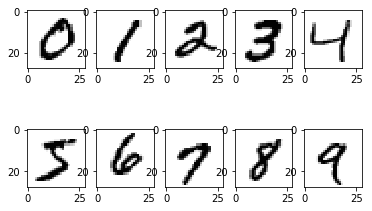

In [8]:
fig,ax = plt.subplots(2,5)
for ix, ax in enumerate(ax.flatten()):
    im = np.argwhere(y_train_mnist == ix)[0]
    plot_im = np.reshape(x_train_mnist[im], (28,28))
    ax.imshow(plot_im, cmap='gray_r')
    

Sweet! Now lets normalize our data.

Because these are images, we're going to normalize them a little differently. Instead of z-scoring them, we can just divide by the max value for a given pixel which will is 255 for RGB images.  

We'll also reshape the data from its current 3D to 2D so we can fit the proper number of samples and channels. We'll do this by keeping the number of samples, `x_train.shape[0]`, and collapsing the other dimensions. As we printed above, we have $6000$  $28 x 28$ images. We'll flatten each image by appending the two dimensions giving us $ 28 x 28 = 784$ columns.  


In [9]:
x_train_mnist = x_train_mnist.reshape(60000, 784) # 784 = 28 * 28
x_test_mnist = x_test_mnist.reshape(10000, 784)
x_train_mnist = x_train_mnist.astype('float32')
x_test_mnist = x_test_mnist.astype('float32')
x_train_mnist /= 255
x_test_mnist /= 255
print(x_train_mnist.shape[0], 'train samples')
print(x_test_mnist.shape[0], 'test samples')

60000 train samples
10000 test samples


Now we convert our labels to the standard 'one hot' format. 

This means we have a $(Samples \ x\ Classes)$ matrix, where the column corresponding to our label gets a one, and everything else gets a zero, per row.  

It looks like this: 

    labels = [[0, 0, 0, 1],
              [1, 0, 0, 0], 
              ...
              [0, 1, 0, 0]] 

In [10]:
y_train_mnist = keras.utils.to_categorical(y_train_mnist, num_classes)
y_test_mnist = keras.utils.to_categorical(y_test_mnist, num_classes)

### Lets see what we get!

Just as before, we'll make our model, fit it, then evaluate.

In [12]:
from keras.models import Sequential
from keras.layers import Dense 

model_mnist = Sequential()

model_mnist.add(Dense(units=64, activation='relu', input_shape=(784,)))
model_mnist.add(Dense(units=64, activation='relu'))
model_mnist.add(Dense(units=64, activation='relu'))
model_mnist.add(Dense(units=num_classes, activation='softmax'))


# Pick your objective/loss function, optimizer, and what metrics to report
model_mnist.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# to train: 
# training data, training labels, how many times to go through data,
# and how many datapoints are shown per training steps

model_mnist.fit(x_train_mnist, y_train_mnist, epochs=10, batch_size=32)

# to evaluate:
# test data, test labels, how many samples at a time (use as many as you can without crashing)
loss_and_metrics = model_mnist.evaluate(x_test_mnist, y_test_mnist, batch_size=32)
print('final loss value =', loss_and_metrics[0])
print('final accuracy = ', loss_and_metrics[1])

Epoch 1/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.7406 - acc: 0.7943
Epoch 2/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.2961 - acc: 0.9144
Epoch 3/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.2365 - acc: 0.9312
Epoch 4/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.1982 - acc: 0.9415
Epoch 5/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.1707 - acc: 0.9499
Epoch 6/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.1509 - acc: 0.9561
Epoch 7/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.1360 - acc: 0.9597
Epoch 8/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.1234 - acc: 0.9637
Epoch 9/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.1129 - acc: 0.9676
Epoch 10/10
10000/10000 [==============================] - 0s 14us/step
final loss value = 0.1131263

### It works!

If you want to toy around with things, see what happens when you change the number of nodes per layer, the number of epochs, or the batch size.  These can have a huge impact on your results, and are often empirically decided, so have at it! 

## Thats all

This is all you need to get started on your own neural network projects!

In the future, I'll make a few notebooks where we tackle convolutional neural networks, heavy data processing and other more advanced concepts.

Thanks for checking this out! 

